**Examples**


Sweeping Parameters

In [1]:
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 4.3 MB/s eta 0:00:00


In [2]:
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')
from modsim import *

Downloaded modsim.py


In [3]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap11.py')

Downloaded chap11.py


In [4]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/chap12.py')

Downloaded chap12.py


In [5]:
from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation
from chap11 import plot_results
from chap12 import calc_total_infected

Sweeping Beta

In [31]:
beta_array = linspace(0.1, 1.1, 11)
gamma = 0.25
def sweep_beta(beta_array, gamma):
    sweep = SweepSeries()
    for beta in beta_array:
        system = make_system(beta, gamma)
        results = run_simulation(system, update_func)
        sweep[beta] = calc_total_infected(results, system)
    return sweep
infected_sweep = sweep_beta(beta_array, gamma)
label = f'gamma = {gamma}'
label

'gamma = 0.25'

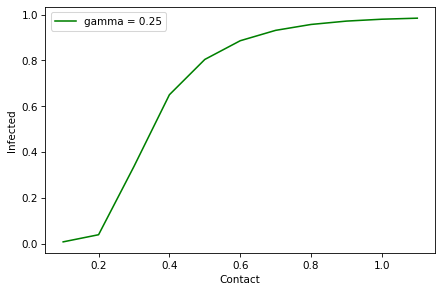

In [33]:
infected_sweep.plot(label=label, color='green')
decorate(xlabel='Contact',
         ylabel='Infected')

Sweeping Gamma

In [34]:
gamma_array = linspace(0.3, 0.9, 5)
gamma_array

array([0.3 , 0.45, 0.6 , 0.75, 0.9 ])

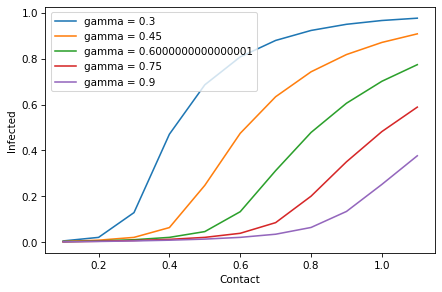

In [36]:
for gamma in gamma_array:
    infected_sweep = sweep_beta(beta_array, gamma)
    label = f'gamma = {gamma}'
    infected_sweep.plot(label=label)
decorate(xlabel='Contact',
         ylabel='Infected')

Using a SweepFrame

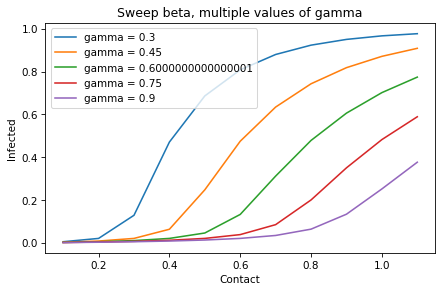

In [37]:
def sweep_parameters(beta_array, gamma_array):
    frame = SweepFrame(columns=gamma_array)
    for gamma in gamma_array:
        frame[gamma] = sweep_beta(beta_array, gamma)
    return frame
frame = sweep_parameters(beta_array, gamma_array)
for gamma in gamma_array:
    label = f'gamma = {gamma}'
    frame[gamma].plot(label=label)
decorate(xlabel='Contact',
         ylabel='Infected',
         title='Sweep beta, multiple values of gamma')

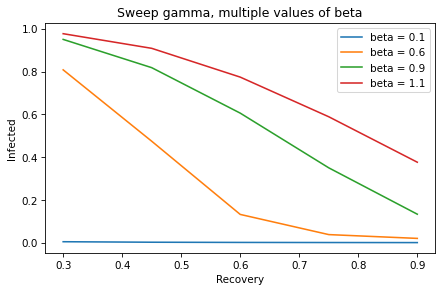

In [38]:
for beta in [0.1, 0.6, 0.9, 1.1]:
    label = f'beta = {beta}'
    frame.loc[beta].plot(label=label)
decorate(xlabel='Recovery',
         ylabel='Infected',
         title='Sweep gamma, multiple values of beta')

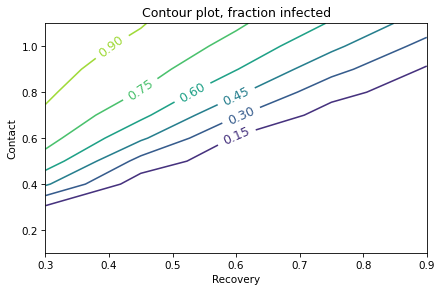

In [39]:
contour(frame)
decorate(xlabel='Recovery',
         ylabel='Contact',
         title='Contour plot, fraction infected')

**Exercises**

Exercise 1

In [40]:
gamma = 1/3
infected_sweep = sweep_beta(beta_arr, gam)
infected_sweep

Parameter
0.500000    0.013396
0.571429    0.018378
0.642857    0.025750
0.714286    0.037534
0.785714    0.058216
0.857143    0.097117
0.928571    0.164195
1.000000    0.251832
1.071429    0.342113
1.142857    0.425750
1.214286    0.500368
1.285714    0.566091
1.357143    0.623758
1.428571    0.674335
1.500000    0.718734
Name: Metric, dtype: float64

In [41]:
beta_estimate = crossings(infected_sweep, 0.5)
beta_estimate

array([1.21391065])

In [42]:
time_between_contacts = 2/beta_estimate
time_between_contacts

array([1.64756772])